In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
import pandas as pd

In [6]:
X=pd.DataFrame (data=iris.data, columns=iris.feature_names)#girdi değişkeni için

In [7]:
X.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [8]:
y=pd.DataFrame(data=iris.target, columns=["irisType"])

In [9]:
y.head()

,irisType
0,0
1,0
2,0
3,0
4,0


In [10]:
y.irisType.value_counts()

0    50
1    50
2    50
Name: irisType, dtype: int64

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
import seaborn as sns

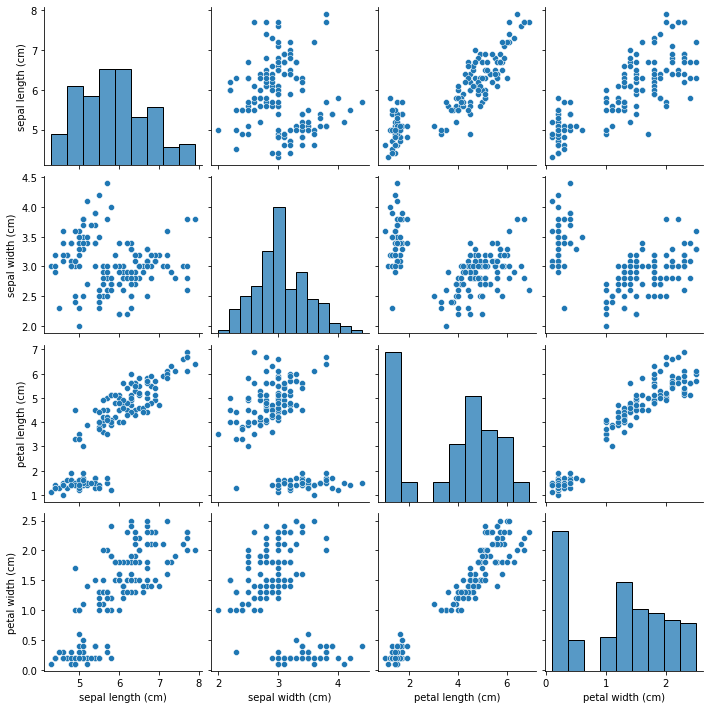

In [13]:
sns.pairplot(X)

In [14]:
X.info() # verimde eksik verim yok 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [15]:
#eğitim verisi ile model kurulur, test verisi ile de test yapılır.
# test verisini model asla görmemelidir.

from sklearn.model_selection import train_test_split


In [16]:
X_train, X_test, y_train, y_test =train_test_split(X , y, test_size=0.2,
                                                   random_state=42)

In [17]:
X_train.shape

(120, 4)

In [18]:
print(y_train.shape)
print(y_test.shape)

(120, 1)
(30, 1)


In [19]:
X_train.var(), X_test.var()

(sepal length (cm)    0.678655
 sepal width (cm)     0.201711
 petal length (cm)    3.070711
 petal width (cm)     0.565938
 dtype: float64,
 sepal length (cm)    0.714069
 sepal width (cm)     0.148000
 petal length (cm)    3.390402
 petal width (cm)     0.657575
 dtype: float64)

In [20]:
import tensorflow as tf

In [21]:
y_train=tf.keras.utils.to_categorical(y_train)

In [22]:
y_test=tf.keras.utils.to_categorical(y_test)

In [23]:
y_train[:5,:] # çıktılar numpy, girdiler pandas dataframe yapısında
#model için bu verileri numpy array yapısına çevirmek gerekli

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [24]:
X_train=X_train.values
X_test=X_test.values

In [25]:
X_train[0]


array([4.6, 3.6, 1. , 0.2])

In [26]:
X_test[0]

array([6.1, 2.8, 4.7, 1.2])

In [27]:
#keras ile bir model kuralım
from tensorflow.keras.models import Sequential #layerları lineer olarak bir araya getirir

In [28]:
from tensorflow.keras.layers import Dense
#Dense oluşturacağımız layerların full bağlı olmasını sağlar

In [62]:
model=Sequential()
model.add(Dense(64,activation="relu", 
                input_shape=X_train[0].shape))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(3,activation="softmax"))
#sonuç değişkeninde 3 tane kategori olduğu için bu layer a 3 tane nöron ekleyelim
# çoklu sınıflandırma problemi old aktivasyon fonk olarak softmax aldık
#eğer ikili sınıflandırma olasaydı sigmoid alıcaktık

In [63]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["acc"])
#optimizer öğrenme boyunca öğrenme oranını ayarlar
# öğrenme oranı model için en iyi ağırlıkların ne kadar sürede hesaplanacağını ayarlar


In [64]:
history=model.fit(X_train,y_train,
         batch_size=32,
         epochs=20,
         validation_split=0.2)
# batch_size model eğitilirken kaçar örnek alınacağını belirler.
#validation modelin eğitimini iyileştirmek için kullanılır


Epoch 1/20
3/3 [==============================] - 0s 69ms/step - loss: 1.0944 - acc: 0.3646 - val_loss: 1.0746 - val_acc: 0.4167
Epoch 2/20
3/3 [==============================] - 0s 11ms/step - loss: 1.0316 - acc: 0.6458 - val_loss: 1.0003 - val_acc: 0.5000
Epoch 3/20
3/3 [==============================] - 0s 12ms/step - loss: 0.9457 - acc: 0.7188 - val_loss: 0.8872 - val_acc: 0.5000
Epoch 4/20
3/3 [==============================] - 0s 12ms/step - loss: 0.8237 - acc: 0.7708 - val_loss: 0.7225 - val_acc: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 12ms/step - loss: 0.6559 - acc: 0.9479 - val_loss: 0.5840 - val_acc: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 12ms/step - loss: 0.4962 - acc: 0.9583 - val_loss: 0.4464 - val_acc: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 11ms/step - loss: 0.3866 - acc: 0.8958 - val_loss: 0.4824 - val_acc: 0.5417
Epoch 8/20
3/3 [==============================] - 0s 11ms/step - loss: 0.3196 - acc: 0.8750 - val

In [65]:
import matplotlib.pyplot as plt

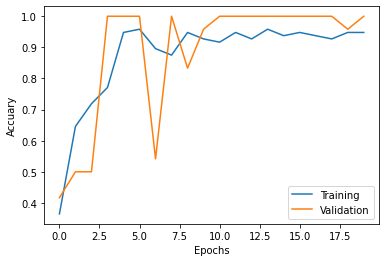

In [66]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.xlabel("Epochs")
plt.ylabel("Accuary")
plt.legend(["Training","Validation"])
# Eğitim geçmişim

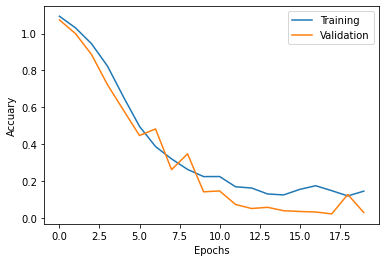

In [67]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Accuary")
plt.legend(["Training","Validation"])

In [68]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.1324 - acc: 0.9667


[0.13241344690322876, 0.9666666388511658]